In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf 
import warnings
warnings.filterwarnings('ignore')

 Gauss Markov Conditions:
* linearity of the model in the coefficients
* the error term should be zero on average
* homoscedasticity
* low multicollinearity
* error terms should be uncorrelated with one other
* features shouldn't be correlated with the errors
* normality of the errors

# Soru 1:
In this exercise, you'll work with historical temperature data from the Szeged, Hungary area. You will download the dataset from Kaggle. To complete this assignment, submit a Jupyter notebook containing your solutions to the following tasks:

* First, load the dataset from Kaggle.
* Build a regression model where the target variable is temperature. As explanatory variables, use humidity, windspeed, windbearing and pressure. Estimate the model using OLS.
* Now, check if your model meets the Gauss-Markov Conditions above. If some of the assumptions are not met, discuss the implications of the violations for the correctness of your model.

In [5]:
df=pd.read_csv("weatherHistory.csv")
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
Formatted Date              96453 non-null object
Summary                     96453 non-null object
Precip Type                 95936 non-null object
Temperature (C)             96453 non-null float64
Apparent Temperature (C)    96453 non-null float64
Humidity                    96453 non-null float64
Wind Speed (km/h)           96453 non-null float64
Wind Bearing (degrees)      96453 non-null float64
Visibility (km)             96453 non-null float64
Loud Cover                  96453 non-null float64
Pressure (millibars)        96453 non-null float64
Daily Summary               96453 non-null object
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [129]:
Y = df["Temperature (C)"] 
X = df[["Humidity","Wind Speed (km/h)","Wind Bearing (degrees)","Pressure (millibars)"]]


In [130]:
lrm=linear_model.LinearRegression()
lrm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [131]:
print("Coefficients: ", lrm.coef_)
print("Bias: ", lrm.intercept_)

Coefficients:  [-3.24962454e+01 -2.01413742e-01  4.04836936e-03 -6.91759209e-04]
Bias:  37.92643818528534


In [ ]:
# Y =  37.92 + (-3.25)*x1 + (-2.01)*x2 + (4.04)*x3 + (-6.91)*x4

# 1. Assumption one: linearity of the model in the coefficients

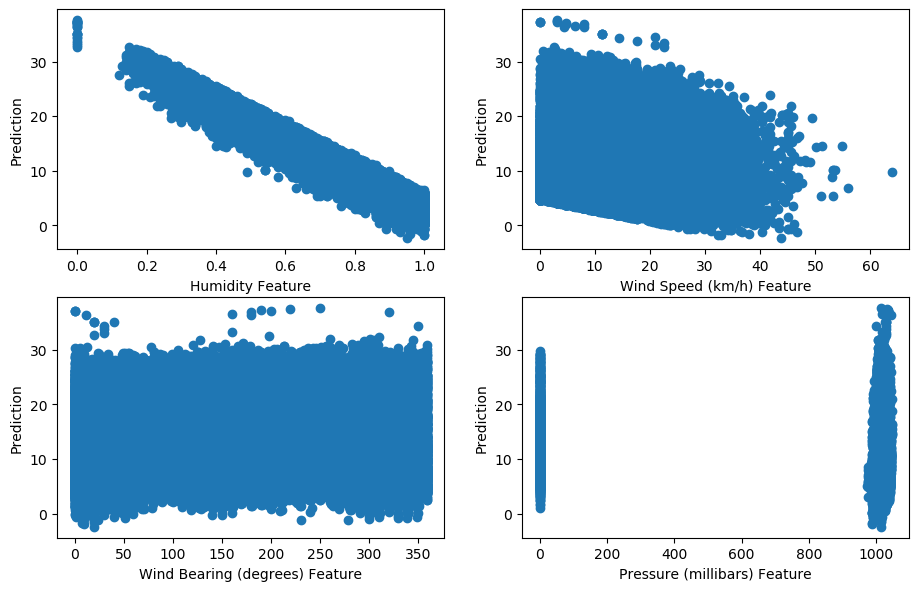

In [132]:
variable = ["Humidity","Wind Speed (km/h)","Wind Bearing (degrees)","Pressure (millibars)"] #features

prediction=lrm.predict(X) # featureları tahmin edelim

plt.figure(figsize=(11,7),dpi=100)

for i in range(0,len(variable)):
    plt.subplot(2,2,i+1)
    plt.xlabel("{} Feature".format(variable[i]))
    plt.ylabel("Prediction")
    plt.scatter(df[variable[i]],prediction)       

# Modelin katsayıları özellikleridir ki, özelliklerin tahmin değerine göre grafiği doğrusal olmalıdır.Her 4 özellik için de doğrusallık vardır.
# Scatter grafiğine göre; humidity, wind speed ve wind bearing değişkenleri için hata terimleri varyansları açıklamada tutarlıdır ancak pressure da değil.

# Tahminin doğru olması demek, gerçek katsayılarla tahminlerin doğrusal olması demektir yani değişkenliğin çok olmamasıdır.
# Örneğin gerçek katsayı 5 ise, bunun lineer regresyon tahmini 5'e yakın olmalı ki hata düşük, sapma az olsun, modelin doğruluğu yüksek olsun.


# 2. Assumption two: the error term should be zero on average

In [133]:
# Hata= hedef değer(regresyon sonucu) - prediction
hata= Y - prediction

print("Mean of error term: {}". format(np.mean(hata))) # amaç hatanın 0'a yakın olmasını sağlamaktır.

# Sonucumuzda hataların ortalaması 0'a yakın çok küçük bir değer çıktığı için bu varsayım doğrudur denir.

Mean of error term: -2.9429698425396953e-15


# 3. Assumption three: homoscedasticity

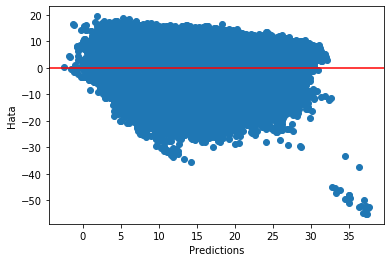

In [135]:
# Homoscedasticity, hata teriminin dağılımı, tüm tahmin edilen değişkenler için tutarlı olmalıdır, yani hata varyansı gözlemlere göre değişmemelidir.

plt.xlabel("Predictions")
plt.ylabel("Hata")
plt.axhline(y=0, c='r')
plt.scatter(prediction, hata);

In [12]:
# Hataların homoscedasticity olup olmadığından emin olmak için 2 farklı istatistiksel test yapılır: bartlett, levene
from scipy.stats import bartlett
from scipy.stats import levene

bart=bartlett(prediction,hata)
lev=levene(prediction,hata)

print("Bartlett test statistic :{:.5f} , p_value :{:.5f}".format(bart[0], bart[1]))
print("Leven test statistic :{:.5f} , p_value :{:.5f}".format(lev[0], lev[1]))

# p<0.05 olduğu için hata terimleri homoscedasticity değildir yani normal dağılmamaktadır.

Bartlett test statistic :2464.84466 , p_value :0.00000
Leven test statistic :2321.24010 , p_value :0.00000


# 4. Assumption four: low multicollinearity

In [60]:
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [13]:
# Bu varsayım, özellikler arasındaki ilişkinin düşük olmasını beklemektedir.

df_xy=df[["Humidity","Wind Speed (km/h)","Wind Bearing (degrees)","Pressure (millibars)"]]
df_xy.head()

corr=df_xy.corr()
corr

# Korelasyonun 0 olması ilişki olmadığı anlamına gelir; 1 ve -1 'e yakın ise de yüksek korelasyondur dolayısıyla kabul edilmemelidir.
# Bu örnekte özellikler arasındaki ilişki 0'a çok yakın olduğundan bu varsayım doğrudur.

,Humidity,Wind Speed (km/h),Wind Bearing (degrees),Pressure (millibars)
Humidity,1.000000,-0.224951,0.000735,0.005454
Wind Speed (km/h),-0.224951,1.000000,0.103822,-0.049263
Wind Bearing (degrees),0.000735,0.103822,1.000000,-0.011651
Pressure (millibars),0.005454,-0.049263,-0.011651,1.000000


# 5. Assumption five: error terms should be uncorrelated with one other

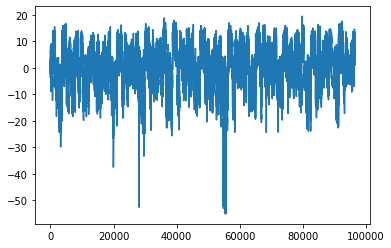

In [14]:
plt.plot(hata);

# Bu varsayıma göre hatalar arasında ilişki olmamalıdır. Yani hatalar belli bir path ile gitmemelidir.
# plot grafiğine göre hatalar gözlem sayısına göre ilişkili değildir; emin olmak için hataların kendi arasındaki autocorrelation fonksiyonuna bakalım:

[1.         0.97132439 0.95630464 0.94210564 0.92685398 0.91314262
 0.90050389 0.88811593 0.87705017 0.86660552 0.85608575 0.84668342
 0.83789614 0.82896975 0.82095096 0.8133657  0.80564993 0.79873509
 0.79243609 0.78576237 0.78010459 0.77500352 0.76927451 0.76320334
 0.75614027 0.75138794 0.74517077 0.73925241 0.73291593 0.72750341
 0.72258836 0.71684989 0.71211606 0.70763612 0.70305152 0.69904304
 0.6952597  0.69121523 0.6880429  0.6853072  0.68192571]
41


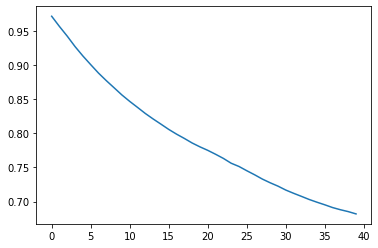

In [18]:
# hatalar arasında ilişki olup olmadığından emin olmak için otokorelasyona bakılır
from statsmodels.tsa.stattools import acf  

acf_data=acf(hata)
print(acf_data)
print(len(acf_data))
plt.plot(acf_data[1:]);

# grafiğe göre hatalar arasındaki korelasyon 0.7 ile 1 arasında değişmektedir yüksek korelasyon vardır. 

# 6. Assumption six: features shouldn't be correlated with the errors

In [31]:
df1=df[["Humidity","Wind Speed (km/h)","Wind Bearing (degrees)","Pressure (millibars)"]]
df1["hata"]=pd.DataFrame(hata)
df1.head()

,Humidity,Wind Speed (km/h),Wind Bearing (degrees),Pressure (millibars),hata
0,0.89,14.1197,251.0,1015.13,2.997429
1,0.86,14.2646,259.0,1015.63,1.903019
2,0.89,3.9284,204.0,1015.94,1.041150
3,0.83,14.1036,269.0,1016.41,-0.210907
4,0.83,11.0446,259.0,1016.51,-0.319812


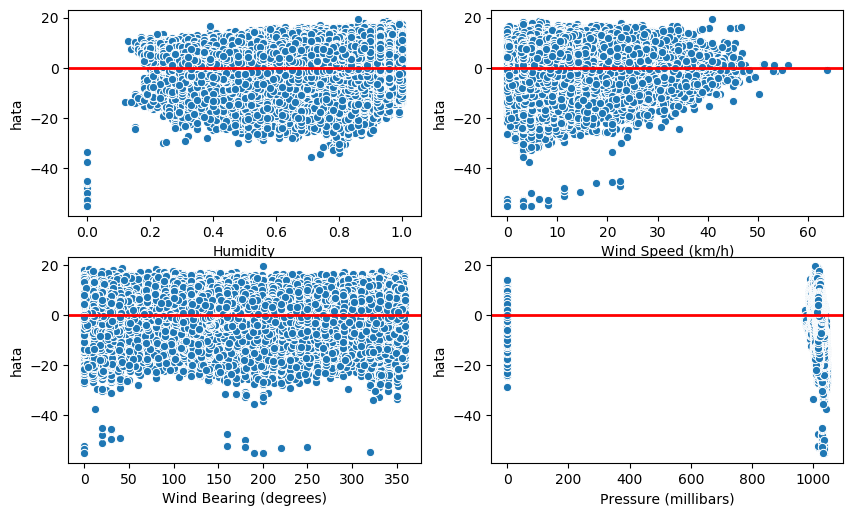

In [38]:
variable=["Humidity","Wind Speed (km/h)","Wind Bearing (degrees)","Pressure (millibars)"]

plt.figure(figsize=(10,6),dpi=100)
for i in range(len(variable)):
    plt.subplot(2,2,i+1)
    plt.axhline(c='r', lw=2)
    sns.scatterplot(df1[variable[i]], df1["hata"]);   
    
    

In [81]:
df1=df[["Humidity","Wind Speed (km/h)","Wind Bearing (degrees)","Pressure (millibars)"]]
df1["hata"]=pd.DataFrame(hata)

corr1=df1.corr()
display(corr1);

# Hatanın özellikler arasındaki ilişkisini incelediğimizde 0'a çok yakındır yani ilişki yoktur denilir.

,Humidity,Wind Speed (km/h),Wind Bearing (degrees),Pressure (millibars),hata
Humidity,1.000000e+00,-2.249515e-01,7.346454e-04,5.454263e-03,-4.027873e-16
Wind Speed (km/h),-2.249515e-01,1.000000e+00,1.038215e-01,-4.926281e-02,2.057654e-16
Wind Bearing (degrees),7.346454e-04,1.038215e-01,1.000000e+00,-1.165088e-02,-1.170681e-16
Pressure (millibars),5.454263e-03,-4.926281e-02,-1.165088e-02,1.000000e+00,-1.313832e-15
hata,-4.027873e-16,2.057654e-16,-1.170681e-16,-1.313832e-15,1.000000e+00


# Soru 2:
To complete this assignment, submit a Jupyter notebook containing your solutions to the following tasks:

* Load the houseprices data from Kaggle.
* Reimplement the model you built in the previous lesson.
* Check for all of the assumptions above and discuss the implications if some of the assumptions are not met.

In [40]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

display(train.head())
display(test.head())

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [42]:
train_id=train["Id"]
test_id=test["Id"]

In [45]:
train.drop("Id", axis=1, inplace=True)
test.drop("Id", axis=1, inplace=True)

train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [69]:
#tüm satırları göstermek için:
pd.options.display.max_rows
pd.set_option("display.max_rows",None)

train.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd

In [52]:
# Null değerlere baktığımızda "Alley", "FireplaceQu", "PoolQC","Fence","MiscFeature" kolonlarında kayıp değer çok olduğu için
# bunları direkt drop edebiliriz.

train.drop("Alley", axis=1, inplace=True)
train.drop("FireplaceQu", axis=1, inplace=True)
train.drop("PoolQC", axis=1, inplace=True)
train.drop("Fence", axis=1, inplace=True)
train.drop("MiscFeature", axis=1, inplace=True)

In [67]:
train["GarageCond"].fillna(train["GarageCond"].mode()[0], inplace=True)

In [68]:
# Sırada: "GarageCond","GarageQual","GarageFinish","GarageYrBlt","GarageType","Electrical","BsmtFinType2","BsmtFinType1",
# BsmtQual","BsmtCond","BsmtExposure", "MasVnrType","MasVnrArea", "LotFrontage"   kolonlarındaki missingleri doldurmak var.

train["GarageCond"].fillna(train["GarageCond"].mode()[0], inplace=True)
train["GarageQual"].fillna(train["GarageQual"].mode()[0], inplace=True)
train["GarageFinish"].fillna(train["GarageFinish"].mode()[0], inplace=True)
train["GarageYrBlt"].fillna(train["GarageYrBlt"].mode()[0], inplace=True)
train["GarageType"].fillna(train["GarageType"].mode()[0], inplace=True)
train["Electrical"].fillna(train["Electrical"].mode()[0], inplace=True)
train["BsmtFinType2"].fillna(train["BsmtFinType2"].mode()[0], inplace=True)
train["BsmtFinType1"].fillna(train["BsmtFinType1"].mode()[0], inplace=True)
train["BsmtQual"].fillna(train["BsmtQual"].mode()[0], inplace=True)
train["BsmtCond"].fillna(train["BsmtCond"].mode()[0], inplace=True)
train["BsmtExposure"].fillna(train["BsmtExposure"].mode()[0], inplace=True)
train["MasVnrType"].fillna(train["MasVnrType"].mode()[0], inplace=True)
train["MasVnrArea"].fillna(train["MasVnrArea"].mode()[0], inplace=True)
train["LotFrontage"].fillna(train["LotFrontage"].mode()[0], inplace=True)

# Böylece tüm missing valuelardan kurtulmuş olduk.

In [89]:
object_type=train.select_dtypes(include="O")
numeric=train.select_dtypes(exclude="O")

display(object_type.head())
display(numeric.head())

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


In [96]:
# Tüm kolonları yanyana görmek için
pd.options.display.max_columns
pd.set_option("display.max_columns",None)

In [97]:
numeric.corr()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.349116,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.023573,-0.069836,-0.065649,-0.140759,-0.238518,-0.251758,0.307886,0.046474,0.074853,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,0.040380,-0.045569,0.098664,-0.040110,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.349116,1.000000,0.281283,0.236891,-0.056461,0.107427,0.087325,0.174146,0.199171,0.034498,0.138852,0.359606,0.404099,0.070626,0.042211,0.359866,0.079531,-0.011613,0.179058,0.037839,0.232143,0.002760,0.319389,0.208721,0.040960,0.264353,0.317925,0.061329,0.131468,0.014349,0.057826,0.036907,0.177999,-0.012274,0.012785,0.003021,0.329220
LotArea,-0.139781,0.281283,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103321,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,-0.042198,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.236891,0.105806,1.000000,-0.091932,0.572323,0.550684,0.407252,0.239666,-0.059119,0.308159,0.537808,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.437998,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.056461,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.125694,-0.046231,0.040229,-0.136841,-0.171098,-0.144203,0.028942,0.025494,-0.079686,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.057583,-0.023820,-0.299203,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,0.027850,0.107427,0.014228,0.572323,-0.375983,1.000000,0.592855,0.311600,0.249503,-0.049107,0.149040,0.391452,0.281986,0.010308,-0.183784,0.199010,0.187599,-0.038162,0.468271,0.242656,-0.070651,-0.174800,0.095589,0.147716,0.700098,0.537850,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.087325,0.013788,0.550684,0.073741,0.592855,1.000000,0.176529,0.128451,-0.067759,0.181133,0.291066,0.240379,0.140024,-0.062419,0.287389,0.119470,-0.012337,0.439046,0.183331,-0.040581,-0.149598,0.191740,0.112581,0.571369,0.420622,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.023573,0.174146,0.103321,0.407252,-0.125694,0.311600,0.176529,1.000000,0.261256,-0.071330,0.113862,0.360067,0.339850,0.173800,-0.068628,0.388052,0.083010,0.027403,0.272999,0.199108,0.102775,-0.038450,0.279568,0.247015,0.209289,0.361945,0.370884,0.159991,0.122528,-0.109907,0.019144,0.062248,0.011928,-0.029512,-0.006723,-0.008317,0.472614
BsmtFinSF1,-0.069836,0.199171,0.214103,0.239666,-0.046231,0.249503,0.128451,0.261256,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.119267,0.224054,0.296970,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.065649,0.034498,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.071330,-0.050117,1.000000,-0.209294,0.104810,0.097117,-0.099260,0.014807,-0.009640,0.158678,0.070948,-0.076444,-0.032148,-0.015728,-0.040751,-0.035227,0.046921,-0.094208,-0.038264,-0.018227,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378


In [173]:
# SalePrice ile en çok ilişkidde bulunan kolonları özelliklerim olarak seçtim.

Y2=numeric["SalePrice"]
X2=numeric[["OverallQual","GrLivArea","GarageCars","GarageArea","TotalBsmtSF"]]

In [174]:
lrm=linear_model.LinearRegression()
lrm.fit(X2,Y2)

print(lrm.coef_,"\n")
print(lrm.intercept_)

[2.36350074e+04 4.53458230e+01 1.45443154e+04 1.71333928e+01
 3.15014753e+01] 

-99072.05038623846


# 1. Assumption one: linearity of the model in the coefficients

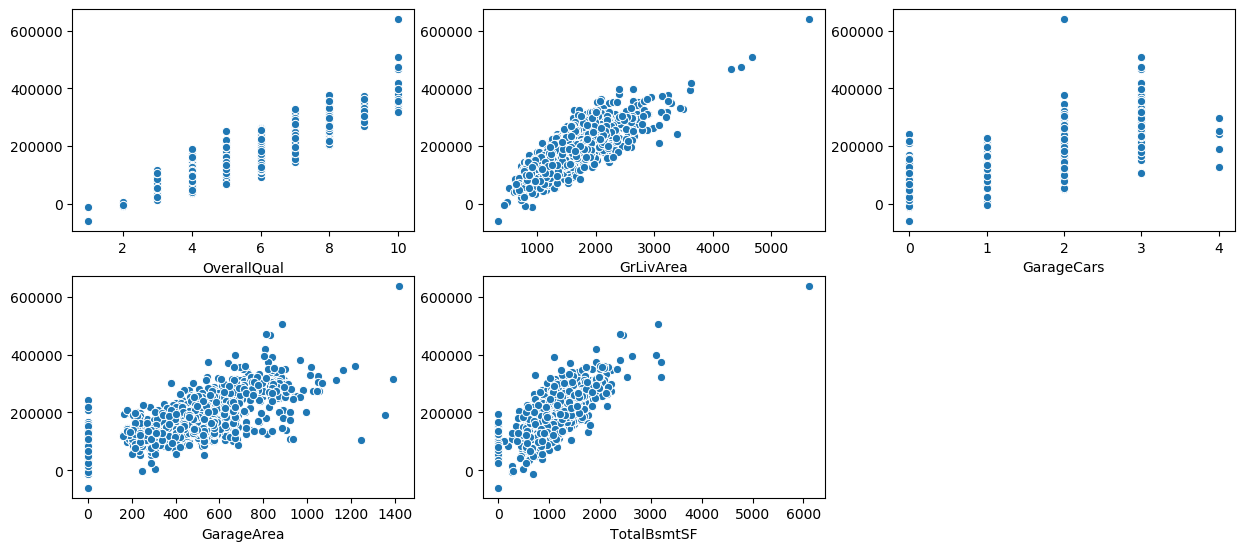

In [175]:
# Katsayılar ve tahminler arasında doğrusal ilişki  olmalıdır

variable=list=(X2.columns)
predictions=lrm.predict(X2)
plt.figure(figsize=(15,10),dpi=100)

for i in range(len(variable)):
    plt.subplot(3,3,i+1)
    sns.scatterplot(X2[variable[i]], predictions);

In [123]:
numeric["GarageArea"].value_counts() # en fazla 0 dan data var yani aslında hiç yok demektir.
numeric["GarageCars"].value_counts() # garagecar kolonundaki tüm datalar içinde 0'dan 81 tane var.

2    824
1    369
3    181
0     81
4      5
Name: GarageCars, dtype: int64

# 2. Assumption two: the error term should be zero on average

In [176]:
# Hata terimlerinin ortalamaıs 0 olmalıdır.

hata2= Y2- predictions
print("The average of error term:", np.mean(hata2))

# görüldüğü gibi çok küçük bir değerdir; 0'a yakındır.

The average of error term: 2.1170046537706295e-11


# 3. Assumption three: homoscedasticity

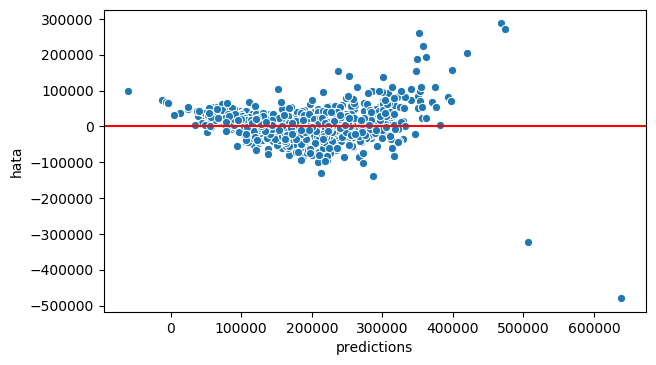

In [178]:
# hatanın özellikler arasındaki ilişkisi doğrusal olmalı

plt.figure(figsize=(7,4),dpi=100)
sns.scatterplot(predictions,hata2)
plt.xlabel("predictions")
plt.ylabel("hata")
plt.axhline(y=0, c='r', lw=1.5);

# Şekilden homoscedasticity gibi durmuyor; emin olmak için bartlett ve levene testi uygulayalım:

In [149]:
from scipy.stats import bartlett
from scipy.stats import levene

In [179]:
bartt=bartlett(predictions,hata2)
leven=levene(predictions,hata2)

print("Bartlett statsistics: {}, p_value: {}". format(bartt[0],bartt[1]),"\n")
print("Levene statistics: {}, p_value: {}". format(leven[0], leven[1]))

# p<0.05 olduğu için homoscedasticity değildir !!!

Bartlett statsistics: 464.43055517960437, p_value: 5.220785707962516e-103 

Levene statistics: 446.5474959792184, p_value: 2.4007988392627964e-92


# 4. Assumption four: low multicollinearity

In [180]:
# Featurelar arasında ilişki olmamalıdır; bunun için korelasyon matrisine bakalım:

X2.corr()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF
OverallQual,1.000000,0.593007,0.600671,0.562022,0.537808
GrLivArea,0.593007,1.000000,0.467247,0.468997,0.454868
GarageCars,0.600671,0.467247,1.000000,0.882475,0.434585
GarageArea,0.562022,0.468997,0.882475,1.000000,0.486665
TotalBsmtSF,0.537808,0.454868,0.434585,0.486665,1.000000


# 5. Assumption five: error terms should be uncorrelated with one other

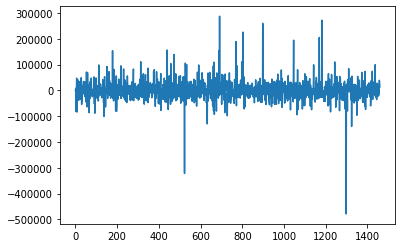

In [181]:
plt.plot(hata2);

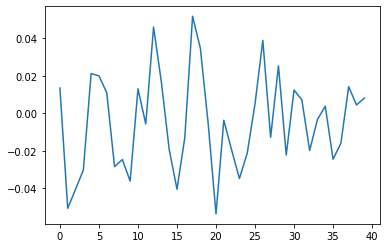

In [182]:
from statsmodels.tsa.stattools import acf

acf_hata2=acf(hata2)
plt.plot(acf_hata2[1:]);

# hatalar arasındaki ilişki -0.04 ile 0.04 arasında olduğu için çok düşüktür.

# 6. Assumption six: features shouldn't be correlated with the errors

In [185]:
X2["hata2"]=pd.DataFrame(hata2)
X2.corr()

# hatalar ile featurelar arasındaki ilişki çok düşüktür.

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,hata2
OverallQual,1.000000e+00,5.930074e-01,6.006707e-01,5.620218e-01,5.378085e-01,2.182857e-14
GrLivArea,5.930074e-01,1.000000e+00,4.672474e-01,4.689975e-01,4.548682e-01,7.411395e-17
GarageCars,6.006707e-01,4.672474e-01,1.000000e+00,8.824754e-01,4.345848e-01,8.029538e-14
GarageArea,5.620218e-01,4.689975e-01,8.824754e-01,1.000000e+00,4.866655e-01,9.139768e-14
TotalBsmtSF,5.378085e-01,4.548682e-01,4.345848e-01,4.866655e-01,1.000000e+00,-1.198119e-14
hata2,2.182857e-14,7.411395e-17,8.029538e-14,9.139768e-14,-1.198119e-14,1.000000e+00
